## Part 1 - Pre-processing of an image  (15 points)
In this part of the lab, we learn how to read an image into a ndarray and manipulate them using various techniques. So let's get started. First to make things simpler, we will initialize the two test images that you can test the code with. As a starter, you are provided with the images, guna-2014.jpg and robot.jpg, but you are encouraged to test the code with many different jpg images.

IMPORTANT: The row and column dimensions of the two images must be the same. If not, you can use paint or other tools to rescale your test images.

In [1]:
# This will help test the code with different test images
image1 = 'data/guna_2014.jpg'
image2 = 'data/robot_2.jpg'

### Task 1.1  Reading the image
In this first task, we would like you to read any jpg image into an ndarray using matplotlib.image.imread. Using matplotlib.pyplot.plt.imshow, you should be able to show the image on your notebook. Also print the dimensions of the image and type of the image in the notebook as shown. Please use your own image and other images for testing this. We will use many random images to see if your algorithm is correct. Both images must be the same dimensions.

In [2]:
### BEGIN SOLUTION
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image = mpimg.imread(image1)
robot = mpimg.imread(image2)
plt.imshow(image)
#plt.imshow(mpimg.imread(image2))
print(type(image))
print(image.shape)
### END SOLUTION

<class 'numpy.ndarray'>
(300, 200, 3)


### Task 1.2 Splitting the image into Red, Green and Blue portions.
The shape and type of the image should indicate that it is a 3D ndarray (row,col,color). The color is an array (R,G,B) where each color is represented by 1 byte (unsigned with range 0-225). In order to perform matrix operatins, we need to split the image into Red, Green and Blue components. Note that you still need to keep the image as a 3D array to plot. But you can make two of the component zero when plotting a specific color. Write the code to split the image into R, G and B and show the images as shown below.

#### Red image

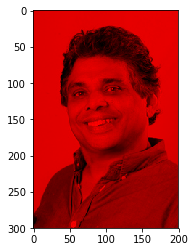

In [3]:
## TASK 1.2.1 Display the image using only the RED pixel values
## BEGIN SOLUTION
#image= (225,0,0)
I_red = image.copy()  # Duplicate image
I_red[:, :, 1] = 0    # Zero out contribution from green
I_red[:, :, 2] = 0
plt.imshow(I_red)
#red_image = image[:,:,(225,0,0)]
#plt.imshow(image)
## END SOLUTION

#### Green image

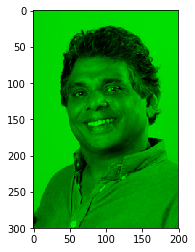

In [4]:
## TASK 1.2.2 Display the image using only the GREEN pixel values
## BEGIN SOLUTION
I_green = image.copy()  # Duplicate image
I_green[:, :, 0] = 0    # Zero out contribution from red
I_green[:, :, 2] = 0
plt.imshow(I_green)

## END SOLUTION

#### Blue image

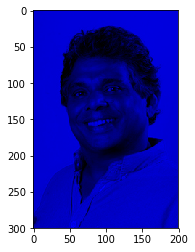

In [5]:
## TASK 1.2.3 Display the image using only the BLUE pixel values
## BEGIN SOLUTION
I_blue = image.copy()  # Duplicate image
I_blue[:, :, 0] = 0    # Zero out contribution from red
I_blue[:, :, 1] = 0
plt.imshow(I_blue)

#dimensions = np.shape(image)

## END SOLUTION

## Part 2 - Transforming images  (15 points)
In this part, we will use linear combinations of two images to transform one image to another. Given two images A and B, define a linear combination of the images as : p.A + (1-p).B  where p is a value (think of p as a probability) between 0 and 1. For example, if p = 0, then we only show image B, and if p=1, then we only show image A. For all other values of p, the two images are transposed on each other. When p is closer to 0, you will mostly notice image B, and if p is closer to 1, you will mostly notice image A. When p is in the middle, the intensity of the pixles will be equally divided between the two images.
In this case, define the matrix p A as, each entry of A is multiplied (or scaled by) p

### Task 2.1
First we will learn how to scale an image by some value p that is between 0 and 1. Write the code to form the matrix p.A for any p, and plot the image. Start with p=0.5 and change it to see how the intensity of the image changes.

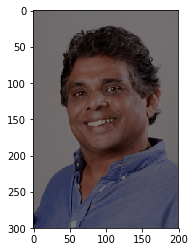

In [6]:
## BEGIN SOLUTION
import numpy as np
p = 0.5

image = mpimg.imread(image1)
imageA = image.copy()
imageA.setflags(write=1)
x,y,z = image.shape
for a in range(x):
    for b in range(y):
        for c in range(z):
            S = image[a, b]
            imageA[a, b] = [S[0]*p,S[1]*p,S[2]*p]           
 
plt.imshow(imageA)
#scale = (p*A[:][:])
#print(A)
## END SOLUTION

### Task 2.2 Reading the second image and scaling
Use image2 to form the matrix (1-p).B for any p, and plot. Start with p=0.5 and change it (increase/decrease) between 0 and 1 to see how the intensity of the image changes. What if p > 1 or p < 0 ? How will you interpret it?  Also show the type of array and dimensions to make sure both images have the same dimensions (in order to superimpose of them properly)

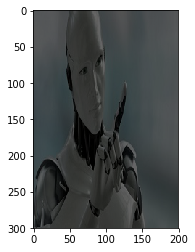

In [53]:
## BEGIN SOLUTION
p = 0.6
#p = 0.5

image = mpimg.imread(image2)
imageA = image.copy()
imageA.setflags(write=1)
x,y,z = image.shape
for a in range(x):
    for b in range(y):
        for c in range(z):
            S = image[a, b]
            imageA[a, b] = [S[0]*(1-p),S[1]*(1-p),S[2]*(1-p)]           
 
plt.imshow(imageA)
## END SOLUTION

### Task 2.3 overlay images on each other. 
Overlay the two images and plot the combined image again. The matrix addition can help here.

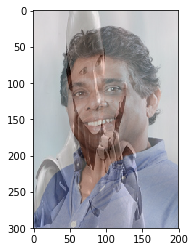

In [8]:
## BEGIN SOLUTION
p = 0.5

A = mpimg.imread(image1)
B= mpimg.imread(image2)
imageA = A.copy()
imageB = B.copy()
imageA.setflags(write=1)
imageB.setflags(write=1)
x,y,z = imageA.shape
for a in range(x):
    for b in range(y):
        for c in range(z):
            S = A[a, b]
            T = B[a, b]
            imageA[a, b] = [(T[0]*p)+(S[0]*(1-p)),(T[1]*p)+(S[1]*(1-p)),(T[2]*p)+(S[2]*(1-p))]           
 
plt.imshow(imageA)
## END SOLUTION

### Task 2.4 Interactive panel design
Now we will use a widget to create an interactive panel that will allow you to experiment with the superimposed images.

In [9]:
# Initialize the widget
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


### Define a function f 
The function f, takes alpha (which we called p before) and allow you to experiment with how the superimposed images changes as alpha changes. You will be able to drag the value between 0 and 1 to see how things change. With alpha = 0, you will get only one image, and with alpha = 1, you will get only the other image. The values of alpha between 0 and 1 will produce an image with varying domination by one image. Alpha = 0.5 is the equilibrium point, where each image is weighed equally.

In [10]:
##  BEGIN SOLUTION
def f(alpha):
    A = mpimg.imread(image1)
    B= mpimg.imread(image2)
    imageA = A.copy()
    imageB = B.copy()
    imageA.setflags(write=1)
    imageB.setflags(write=1)
    x,y,z = imageA.shape
    for a in range(x):
        for b in range(y):
            for c in range(z):
                S = A[a, b]
                T = B[a, b]
                imageA[a, b] = [(T[0]*alpha)+(S[0]*(1-alpha)),(T[1]*alpha)+(S[1]*(1-alpha)),(T[2]*alpha)+(S[2]*(1-alpha))] 
                
    ##  END SOLUTION
        plt.imshow(imageA)
interact(f, alpha=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

## Part 3 - Application of Singular Value Decomposition  (15 points)
Singular value decomposition or SVD allows us to approximate the image using fewer bits of information about the structure of the image matrix. A readings on this method can be found from an excerpt of the linear algebra book by Jain and Gunawardena. (to be posted soon)

The singular value decomposition allows us to approximate a matrix using its decomposition into three matrices A = U S V^T
where U and V are orthogonal matrices and S is a diagonal matrix with singular values (V^T indicates the transpose of matrix V). The singular values are the eigen values of the matrix A A^T.

### Task 3.1 Representation of matrices as 2D
Prior to applying SVD to our image matrix, we need to transform the individual 3D matrices into 2D matrices. Basically, we can view any color component as color densities of one color and ignore the color dimension when we are transforming from 3D to 2D.

In [11]:
# transform the RED, GREEN, BLUE matrices into a 2D matrices of red, green, blue color density
# BEGIN SOLUTION
# create three 2D matrices (int type) each for colors, R, G, B. Be sure to match the 
# dimensions of the image matrix

R = imageA[:,:,0].astype('int')
G = imageA[:,:,1].astype('int')
B = imageA[:,:,2].astype('int')


# copy the corresponding values from 3D image matrix



# END SOLUTION
print(R,G,B)


[[218 217 216 ... 218 218 219]
 [216 216 216 ... 218 218 218]
 [215 215 216 ... 218 218 219]
 ...
 [ 80 138 114 ... 155 157 149]
 [ 87 138 114 ... 154 155 148]
 [114 148 140 ... 154 148 145]] [[216 215 214 ... 218 218 218]
 [214 214 214 ... 216 216 217]
 [213 213 213 ... 216 216 217]
 ...
 [ 88 145 123 ... 167 169 162]
 [ 96 148 123 ... 167 168 161]
 [126 158 151 ... 167 161 158]] [[217 217 217 ... 220 220 220]
 [216 216 216 ... 219 219 219]
 [216 217 217 ... 219 219 219]
 ...
 [119 177 156 ... 195 195 187]
 [128 180 156 ... 194 194 188]
 [158 191 183 ... 193 188 186]]


### Task 3.1 Finding Singular values and Orthogonal matrices
Find the singular value decomposition of matrices R, G, B. List the singular values (S) and the orthogonal matrices (U, V) for colors R,G,B as (UR,sR, VhR), (UG,sG, VhG), (UB,sB, VhB).  

In [12]:
# BEGIN SOLUTION
from scipy import linalg
UR, sR, VhR = linalg.svd(R, full_matrices=False)
UG, sG, VhG = linalg.svd(G, full_matrices=False)
UB, sB, VhB = linalg.svd(B, full_matrices=False)

# END SOLUTION
print(sR, sG, sB)

[3.93707946e+04 4.35841681e+03 3.08312474e+03 2.17383050e+03
 2.01789078e+03 1.52583460e+03 1.36648971e+03 1.18809884e+03
 1.16831590e+03 1.10257378e+03 1.02338700e+03 9.55294021e+02
 7.91529490e+02 7.20344003e+02 6.97775657e+02 6.49962389e+02
 6.33121850e+02 5.76253797e+02 5.43684501e+02 5.31112022e+02
 5.22632420e+02 4.88001302e+02 4.71941124e+02 4.59283118e+02
 4.32312938e+02 4.23566165e+02 4.02489320e+02 3.91076187e+02
 3.78591195e+02 3.71081006e+02 3.57295202e+02 3.36698745e+02
 3.25492169e+02 3.15699127e+02 3.03330493e+02 2.95149351e+02
 2.89030332e+02 2.82690006e+02 2.71779781e+02 2.66950160e+02
 2.55427697e+02 2.53211822e+02 2.49735099e+02 2.47962193e+02
 2.31390820e+02 2.25124459e+02 2.19890359e+02 2.18147290e+02
 2.14179213e+02 2.04860303e+02 1.98178746e+02 1.95022365e+02
 1.90347799e+02 1.87921526e+02 1.82062249e+02 1.75521705e+02
 1.71731381e+02 1.67132616e+02 1.63968430e+02 1.62570995e+02
 1.60275005e+02 1.58042506e+02 1.55016597e+02 1.52914241e+02
 1.51316933e+02 1.480348

### Task 3.2 Finding a rank-1 approximation
A rank 1 approximation (starting with the highest eigenvalue lambda_1) 
can be done using $\lambda_{1}*u_1*v_1^T$ where $u_1$ and $v_1$ are column vectors. These column vectors are the first columns of the orthogonal matrices U and V, that are part of the SVD. We note that the multiplication of a column vector by a row vector in fact produces an approximated matrix.

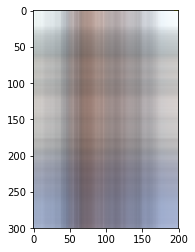

In [28]:
## Find the rank-1 approximation and show the image generated by it.
## BEGIN SOLUTION
#U, s , V = linalg.svd(A, full_matrices=False)


# compute the rank 1 term
col_vectorUR = UR[:,0].reshape(300,1)
row_vectorVhR = VhR.T[:,0].reshape(1,200)
rank1R = sR[0]*col_vectorUR*row_vectorVhR

col_vectorUG = UG[:,0].reshape(300,1)
row_vectorVhG = VhG.T[:,0].reshape(1,200)
rank1G = sG[0]*col_vectorUG*row_vectorVhG

col_vectorUB = UB[:,0].reshape(300,1)
row_vectorVhB = VhB.T[:,0].reshape(1,200)
rank1B = sB[0]*col_vectorUB*row_vectorVhB

for a in range(x):
    for b in range(y):
        for c in range(z):
            S = image[a, b]
            imageA[a, b] = [rank1R[a,b],rank1G[a,b],rank1B[a,b]]           
 
plt.imshow(imageA)

## END SOLUTION

### Task 3.2 Finding a rank-2 approximation
A rank 2 approximation add another term to the rank_1 approximation as follows. If the second largest eigen value is lambda_2, then we have the approximation as  $\lambda_{1}*u_1*v_1^T + \lambda_{2}*u_2*v_2^T$ where $u_1, u_2$ and $v_1, v_2$ are column vectors

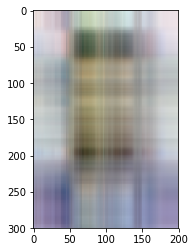

In [34]:
## Find the rank-2 approximation and show the image generated by it.
## BEGIN SOLUTION
col_vectorUR = UR[:,1].reshape(300,1)
row_vectorVhR = VhR.T[:,1].reshape(1,200)
rank2R = sR[1]*col_vectorUR*row_vectorVhR
rank2R = rank2R+rank1R

col_vectorUG = UG[:,1].reshape(300,1)
row_vectorVhG = VhG.T[:,1].reshape(1,200)
rank2G = sG[1]*col_vectorUG*row_vectorVhG
rank2G = rank2G+rank1R

col_vectorUB = UB[:,1].reshape(300,1)
row_vectorVhB = VhB.T[:,1].reshape(1,200)
rank2B = sB[1]*col_vectorUB*row_vectorVhB
rank2B = rank2B+rank1B

for a in range(x):
    for b in range(y):
        for c in range(z):
            S = image[a, b]
            imageA[a, b] = [rank2R[a,b],rank2G[a,b],rank2B[a,b]]           
 
plt.imshow(imageA)

## END SOLUTION

### Task 3.2 Finding a rank-k approximation
A rank k approximation is the sum of first k-terms of rank approximations. For example, if u[i] and v[i] are the i-th column vectors, and lambda_i is the i-th largest eigen value, then we have the approximation as 
$ \sum \lambda_{i}*u_i*v_i^T, i=1,2,...k$
Start with any k (including k=1 and k=2) to see if you get the same outcomes as above, and then changing it until you get a clearer image. You can play with k to see which one gives you a better approximation. The following is the image when k = 10

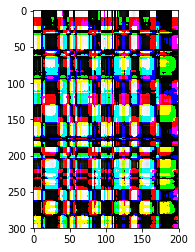

In [51]:
## Find the rank-k approximation and show the image generated by it.
## BEGIN SOLUTION
k = 10
for x in range(k):
    col_vectorUR = UR[:,k].reshape(300,1)
    row_vectorVhR = VhR.T[:,k].reshape(1,200)
    rankKR = sR[k]*col_vectorUR*row_vectorVhR
    rankKR = rankKR + rankKR[k-1]

    col_vectorUG = UG[:,k].reshape(300,1)
    row_vectorVhG = VhG.T[:,k].reshape(1,200)
    rankKG = sG[k]*col_vectorUG*row_vectorVhG
    rankKG = rankKG + rankKR[k-1]

    col_vectorUB = UB[:,k].reshape(300,1)
    row_vectorVhB = VhB.T[:,k].reshape(1,200)
    rankKB = sB[k]*col_vectorUB*row_vectorVhB
    rankKB = rankKB + + rankKR[k-1]

    
for a in range(x):
    for b in range(y):
        for c in range(z):
            S = image[a, b]
            imageA[a, b] = [rankKR[a,b],rankKG[a,b],rankKB[a,b]]           

plt.imshow(imageA)

#reshape
## END SOLUTION

## Part 3 - Open Ended Question  (points 5)
The SVD method we learned here can be viewed as a form of image compression. That is, instead of using all pixles of an m x n image matrix, we can use a few eigen vlaues and vectors to form an approximation to the original matrix. What would be a possible application of this idea? 
Hint: There can be many. So any reasonable answer is fine. Write the answer in the cell below. Be as creative as possible.

In [52]:
### BEGIN ANSWER

#The idea of SVD can be used in the applications of Data Mining, Signal Processing and Compression


### END ANSWER

##### Lab developed by A.D. Gunawardena @ 2019